In [1]:
import pandas as pd
import numpy as np
h1 = pd.read_csv("H1.csv")
print(h1.shape)
h1.head()

(40060, 31)


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
h1.describe().T

,count,mean,std,min,25%,50%,75%,max
IsCanceled,40060.0,0.277634,0.447837,0.00,0.0,0.0,1.0,1.0
LeadTime,40060.0,92.675686,97.285315,0.00,10.0,57.0,155.0,737.0
ArrivalDateYear,40060.0,2016.121443,0.722347,2015.00,2016.0,2016.0,2017.0,2017.0
ArrivalDateWeekNumber,40060.0,27.140864,14.005441,1.00,16.0,28.0,38.0,53.0
ArrivalDateDayOfMonth,40060.0,15.821243,8.883708,1.00,8.0,16.0,24.0,31.0
StaysInWeekendNights,40060.0,1.189815,1.147812,0.00,0.0,1.0,2.0,19.0
StaysInWeekNights,40060.0,3.128732,2.461329,0.00,1.0,3.0,5.0,50.0
Adults,40060.0,1.867149,0.697285,0.00,2.0,2.0,2.0,55.0
Children,40060.0,0.128682,0.445195,0.00,0.0,0.0,0.0,10.0
Babies,40060.0,0.013904,0.118998,0.00,0.0,0.0,0.0,2.0


##### country column 
* variety of nationality
* highest visiting nationality

In [3]:
# variety of nationality
print(len(h1['Country'].unique()))

126


In [4]:
# highest visiting nationality
h1['count'] = 1
countries = h1.groupby(['Country']).agg({"count" : sum}).sort_values(by='count', ascending=False)
countries

,count
Country,
PRT,17630
GBR,6814
ESP,3957
IRL,2166
FRA,1611
...,...
MKD,1
PLW,1
PER,1


In [5]:
countries.plot()

<AxesSubplot:xlabel='Country'>

<AxesSubplot:xlabel='Country'>

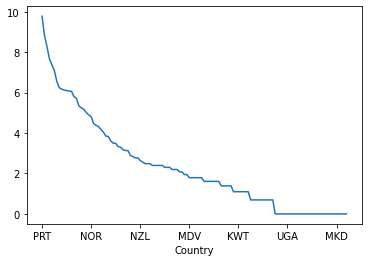

In [6]:
# apply log scaling
# To show the difference between small values
countries['count'].apply(lambda x : np.log(x)).plot()

##### cancellation ratio by nationality
* highest cancellation nationality

In [7]:
# cancellation rate according to nationality
country_cancel = h1.groupby("Country").agg({"IsCanceled":np.mean}).sort_values(by='IsCanceled', ascending=False)
country_cancel

,IsCanceled
Country,
SEN,1.0
JEY,1.0
TUN,1.0
SYC,1.0
GGY,1.0
...,...
JPN,0.0
JAM,0.0
ISL,0.0


In [8]:
# fliter by valid countries (visit over 100) 
valid = list(countries.loc[countries['count'] > 100].T.columns)
country_cancel.T[valid].T.sort_values(by='IsCanceled', ascending=False)

,IsCanceled
Country,
PRT,0.421894
RUS,0.322751
CHE,0.257471
SWE,0.240132
BRA,0.234884
ESP,0.215062
IRL,0.199446
NOR,0.186992
ROU,0.180791


<AxesSubplot:xlabel='LeadTime'>

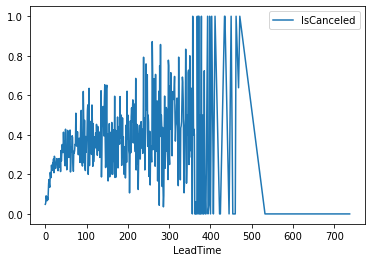

In [9]:
# effect of leadtime on cancellation rate
h1.groupby("LeadTime").agg({"IsCanceled": np.mean}).plot()

<AxesSubplot:xlabel='LeadTime_month'>

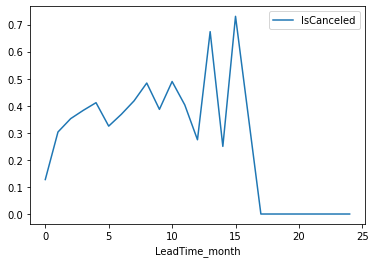

In [10]:
# effect of leadtime_week on cacellation rate
h1['LeadTime_month'] = h1['LeadTime'].apply(lambda x: x//30)
ga = h1.groupby("LeadTime_month").agg({"IsCanceled" : np.mean})
ga.plot()

##### information from exploration
* 125 nationality
* most of customers are from PRT
* most customers by nationality visited few times
* PRT customers cancel reservations the most
* the shorter the lead time, the lower the cancellation rate.

##### map Categorial, Nominal data to numerical data
* DepositType
* Meal

In [11]:
# DepositType
h1['DepositType'].unique()

array(['No Deposit     ', 'Refundable     ', 'Non Refund     '],
      dtype=object)

In [12]:
h1['DepositType'] = h1['DepositType'].apply(lambda x: x.strip())
h1['DepositType'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [13]:
mapper = {"No Deposit" : 0, 'Refundable' : 1, 'Non Refund' : 2 }
h1['CustomerRisk'] = h1['DepositType'].map(mapper)
h1['CustomerRisk'].unique()

array([0, 1, 2], dtype=int64)

In [14]:
# Mean
h1['Meal'].unique()

array(['BB       ', 'FB       ', 'HB       ', 'SC       ', 'Undefined'],
      dtype=object)

In [15]:
h1['Meal'] = h1['Meal'].apply(lambda x: x.strip())
h1['Meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [16]:
mapper = {'SC':0, 'Undefined':0, 'BB':1, 'HB':2, 'FB':3}
h1['Stay'] = h1['Meal'].map(mapper)
h1['Stay'].unique()

array([1, 3, 2, 0], dtype=int64)

##### train/ test set split

In [17]:
h1.describe().columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'count',
       'LeadTime_month', 'CustomerRisk', 'Stay'],
      dtype='object')

In [18]:
features = ['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'count',
       'CustomerRisk', 'Stay']
label = "IsCanceled"

In [19]:
train, test = h1[::2].reset_index(), h1[1::2].reset_index()
X_train, y_train = train[features], train[label]
X_test, y_test  = test[features], test[label]

##### model planning

In [20]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.tree import export_graphviz as eg
model = dt()
model.fit(X_train, y_train)
eg(model, out_file='tree.txt', feature_names=features, class_names=['no', 'yes'])

In [21]:
split_1 = train.loc[train['CustomerRisk'] <= 1.5]
split_2 = split_1.loc[split_1['LeadTime'] > 13.5]
split_3 = split_2.loc[split_2['RequiredCarParkingSpaces'] > 0.5]
split_3['IsCanceled'].sum()

0

In [22]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier as rf
model = rf()
model.fit(X_train, y_train)

RandomForestClassifier()

<AxesSubplot:xlabel='predict', ylabel='actual'>

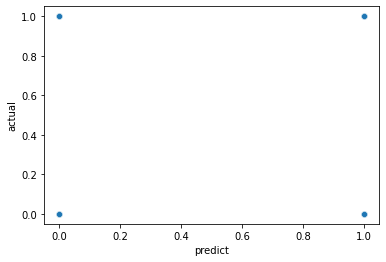

In [23]:
import seaborn as sns
for_plot = pd.DataFrame()
for_plot['predict'] = model.predict(X_test)
for_plot['actual'] = y_test
sns.scatterplot(data=for_plot, x='predict', y='actual') # label values = [0,1] -> have to use confusion matrix

##### Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix as cm
cm_data = cm(for_plot['actual'], for_plot['predict'])
TN, FP, FN, TP = cm_data.ravel()
print(TN, FP, FN, TP)

13625 813 2208 3384


In [25]:
# accuracy
acc = (TP + TN) / (TP + TN + FP + FN)
acc  

0.8491762356465302

In [26]:
# percentage of positive predictions correct
prec = TP / (TP + FP)
prec

0.806290207290922

In [27]:
# proportion of correct predicted values out of actual value 1(positive)
recall = TP / (TP + FN)
recall

0.6051502145922747

In [28]:
# proportion of incorrect predicted values out of actual value 0(negative)
fall_out = FP / (FP + TN)
fall_out

0.05630973819088517

In [29]:
all_len = len(train)
actual_1_count = train['IsCanceled'].sum()
actual_0_count = all_len - actual_1_count
print(actual_1_count, actual_0_count)

5530 14500


* big difference in numbers (positive and negative)

In [30]:
# ex) 
tp = 0
tn = 1000000
fp = 0
fn = 100
acc = (tp + tn) /(tp + tn + fp + fn)
acc

0.9999000099990001

##### ROC Curve, PR Curve 
* In the classification problem, the performance is judged by a ROC curve.

In [32]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import GradientBoostingClassifier as gb
m1, m2, m3 = dt(), rf(), gb()
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)

GradientBoostingClassifier()

In [33]:
r1 = pd.DataFrame(m1.predict_proba(X_test), columns=['neg', 'pos'])
r2 = pd.DataFrame(m2.predict_proba(X_test), columns=['neg', 'pos'])
r3 = pd.DataFrame(m3.predict_proba(X_test), columns=['neg', 'pos'])

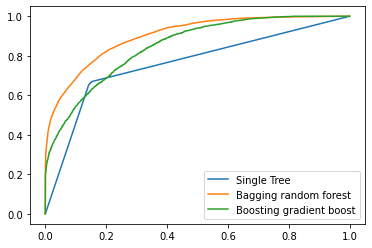

In [34]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
x1, y1, _ = roc_curve(y_test, r1['pos'])
x2, y2, _ = roc_curve(y_test, r2['pos'])
x3, y3, _ = roc_curve(y_test, r3['pos'])
plt.plot(x1, y1, label='Single Tree')
plt.plot(x2, y2, label='Bagging random forest')
plt.plot(x3, y3, label='Boosting gradient boost')
plt.legend()

In [43]:
r2['actual'] = y_test
r2.head()

,neg,pos,actaul,predict,actuall,actual
0,0.886667,0.113333,0,0,0,0
1,0.793333,0.206667,0,0,0,0
2,0.880000,0.120000,0,0,0,0
3,0.930000,0.070000,0,0,0,0
4,0.590000,0.410000,1,0,1,1


In [44]:
r2['predict'] = 0
r2.loc[r2['pos'] > 0.999, 'predict'] = 1
cm_data = cm(r2['actual'], r2['predict'])
cm_data

array([[14437,     1],
       [ 4509,  1083]], dtype=int64)

In [46]:
all_data = []
for i in range(100):
    r2['predict'] = 0
    r2.loc[r2['pos'] > i *0.01, 'predict'] = 1
    cm_data = cm(r2['actual'], r2['predict'])
    TN, FP, FN, TP = cm_data.ravel()
    prec = TP / (TP + FP)
    recall = TP / (TP + FN)
    fall_out = FP / (FP + TN)
    all_data.append({'prec' : prec, 'recall' : recall, 'fall_out' : fall_out})

In [47]:
roc =pd.DataFrame(all_data)
roc.head()

,prec,recall,fall_out
0,0.316049,0.997318,0.835919
1,0.339206,0.994993,0.750727
2,0.356340,0.992489,0.694348
3,0.368687,0.990880,0.657155
4,0.378502,0.988019,0.628342


<AxesSubplot:xlabel='fall_out', ylabel='recall'>

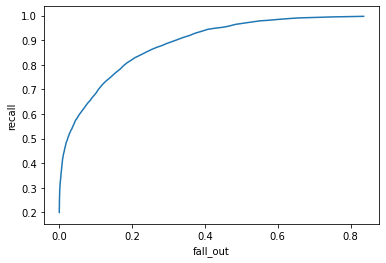

In [50]:
# ROC Curve
sns.lineplot(data = roc, x='fall_out', y='recall')

<AxesSubplot:xlabel='recall', ylabel='prec'>

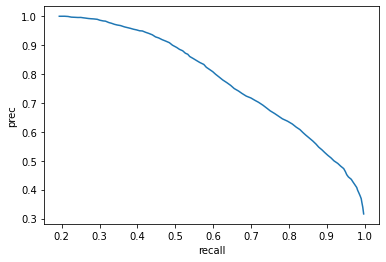

In [51]:
# PR Curve
sns.lineplot(data = roc, x='recall', y='prec')

##### Hyper parameter tuning
* adjust parameter value of model

In [52]:
# random forest default recall = 0.6051502145922747

In [57]:
def scorer(model):
    model.fit(X_train, y_train)
    for_plot = pd.DataFrame()
    for_plot['predict'] = model.predict(X_test)
    for_plot['actual'] = y_test
    TN, FP, FN, TP = cm(for_plot['actual'], for_plot['predict']).ravel()
    recall = TP / (TP + FN)
    return recall

In [58]:
from sklearn.ensemble import GradientBoostingClassifier as gb
model = gb(learning_rate=0.1, n_estimators = 100, 
          max_depth = 20, max_features = 0.9)

In [59]:
scorer(model)

0.6224964234620887

##### Hyper parameter tuning - Grid Search 

In [62]:
n_estimators = [3,4,5,6]
learning_rate = [0.01, 0.05, 0.1]
max_features = [0.1, 0.3, 0.5, 0.7, 0.9]
max_depth = [3, 5, 7, 9, 12]
all_scores = []
for a in n_estimators:
    for b in learning_rate:
        for c in max_features:
            for d in max_depth:
                model = gb(learning_rate=b, n_estimators = a,
                          max_depth = d, max_features = c)
                recall = scorer(model)
                all_scores.append({'a' : a, 'b': b, 'c': c, 'd':d, 'score': recall})
score_df = pd.DataFrame(all_scores)

In [63]:
score_df.sort_values(by='score', ascending=False)

,a,b,c,d,score
299,6,0.10,0.9,12,0.289163
289,6,0.10,0.5,12,0.278791
294,6,0.10,0.7,12,0.273247
293,6,0.10,0.7,9,0.264306
219,5,0.10,0.7,12,0.254828
...,...,...,...,...,...
103,4,0.05,0.1,9,0.000000
104,4,0.05,0.1,12,0.000000
105,4,0.05,0.3,3,0.000000
106,4,0.05,0.3,5,0.000000


##### Hyper parameter tuning - Random Search
* find random combination within a set time

In [66]:
import time
from random import randint
all_scores = []
t0 = time.time()
while True:
    if time.time() -t0 > 30 : break
    a = randint(3,10)
    b = randint(1,1000)/1000
    c = randint(1,1000)/1000
    d = randint(3,10)
    model = gb(learning_rate = b, n_estimators = a,
              max_depth = d, max_features=c)
    recall = scorer(model)
    all_scores.append({'a':a, 'b':b, 'c':c, 'd':d, 'score': recall})

In [67]:
result_df = pd.DataFrame(all_scores)
result_df.sort_values(by='score', ascending = False)

,a,b,c,d,score
34,10,0.839,0.462,10,0.577432
25,10,0.752,0.764,9,0.547926
50,8,0.937,0.176,7,0.489092
27,7,0.869,0.595,6,0.478362
36,8,0.511,0.522,8,0.462804
...,...,...,...,...,...
53,3,0.095,0.805,6,0.000000
16,4,0.019,0.197,4,0.000000
56,4,0.022,0.457,4,0.000000
11,3,0.076,0.304,7,0.000000
